# Predicting Diabetes using different ML Algorithms

## The dataset:
## Link to Dataset Output [Diabetes Health Indicators Dataset](https://www.kaggle.com/alexteboul/diabetes-health-indicators-dataset)
**253,680 survey responses from cleaned BRFSS 2015 - binary classification**
The dataset originally has 330 features (columns), but based on diabetes disease research regarding factors influencing diabetes disease and other chronic health conditions, only select features are included in this analysis.

#### Important Risk Factors
Research in the field has identified the following as **important risk factors** for diabetes and other chronic illnesses like heart disease (not in strict order of importance):

*   blood pressure (high)
*   cholesterol (high)
*   smoking
*   diabetes
*   obesity
*   age
*   sex
*   race
*   diet
*   exercise
*   alcohol consumption
*   BMI
*   Household Income
*   Marital Status
*   Sleep
*   Time since last checkup
*   Education
*   Health care coverage
*   Mental Health

### Selected Subset of Features from BRFSS 2015
Given the risk factors the following features were selected. The BRFSS 2015 Codebook has more information on each of the question asked.

**BRFSS 2015 Codebook:** https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf

**Relevant Research Paper using BRFSS for Diabetes ML:** https://www.cdc.gov/pcd/issues/2019/19_0109.htm


The **selected features** from the BRFSS 2015 dataset are:

**Response Variable / Dependent Variable:**
*   (Ever told) you have diabetes (If "Yes" and respondent is female, ask "Was this only when you were pregnant?". If Respondent says pre-diabetes or borderline diabetes, use response code 4.) --> DIABETE3

**Independent Variables:**

**High Blood Pressure**
*   Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional --> _RFHYPE5

**High Cholesterol**
*   Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? --> TOLDHI2
*   Cholesterol check within past five years --> _CHOLCHK

**BMI**
*   Body Mass Index (BMI) --> _BMI5

**Smoking**
*   Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] --> SMOKE100

**Other Chronic Health Conditions**
*   (Ever told) you had a stroke. --> CVDSTRK3
*   Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) --> _MICHD

**Physical Activity**
*   Adults who reported doing physical activity or exercise during the past 30 days other than their regular job --> _TOTINDA

**Diet**
*   Consume Fruit 1 or more times per day --> _FRTLT1
*   Consume Vegetables 1 or more times per day --> _VEGLT1

**Alcohol Consumption**
*   Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) --> _RFDRHV5

**Health Care**
*   Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service?  --> HLTHPLN1
*   Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? --> MEDCOST

**Health General and Mental Health**
*   Would you say that in general your health is: --> GENHLTH
*   Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? --> MENTHLTH
*   Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? --> PHYSHLTH
*   Do you have serious difficulty walking or climbing stairs? --> DIFFWALK

**Demographics**
*   Indicate sex of respondent. --> SEX
*   Fourteen-level age category --> _AGEG5YR
*   What is the highest grade or year of school you completed? --> EDUCA
*   Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") --> INCOME2

# Preparing the dataset
## 1. Get the data

In [3]:
#imports
import os
import pandas as pd
import numpy as np
import random
random.seed(42)

In [4]:
##### read in the dataset
brfss_2015_dataset = pd.read_csv(f'../input/behavioral-risk-factor-surveillance-system/2015.csv')

In [5]:
#How many rows and columns
brfss_2015_dataset.shape

(441456, 330)

In [6]:
#check that the data loaded in is in the correct format
pd.set_option('display.max_columns', 500)
brfss_2015_dataset.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,LADULT,NUMADULT,NUMMEN,NUMWOMEN,CTELNUM1,CELLFON2,CADULT,PVTRESD2,CCLGHOUS,CSTATE,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUITJU1,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAIN,SEATBELT,FLUSHOT6,FLSHTMY2,IMFVPLAC,PNEUVAC3,HIVTST6,HIVTSTD3,WHRTST10,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,CAREGIV1,CRGVREL1,CRGVLNG1,CRGVHRS1,CRGVPRB1,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,VIDFCLT2,VIREDIF3,VIPRFVS2,VINOCRE2,VIEYEXM2,VIINSUR2,VICTRCT4,VIGLUMA2,VIMACDG2,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,WTCHSALT,LONGWTCH,DRADVISE,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,TETANUS,HPVADVC2,HPVADSHT,SHINGLE2,HADMAM,HOWLONG,HADPAP2,LASTPAP2,HPVTEST,HPLSTTST,HADHYST2,PROFEXAM,LENGEXAM,BLDSTOOL,LSTBLDS3,HADSIGM3,HADSGCO1,LASTSIG3,PCPSAAD2,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,PCPSADE1,PCDMDECN,SCNTMNY1,SCNTMEL1,SCNTPAID,SCNTWRK1,SCNTLPAD,SCNTLWK1,SXORIENT,TRNSGNDR,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,EMTSUPRT,LSATISFY,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,MISTMNT,ADANXEV,QSTVER,QSTLANG,EXACTOT1,EXACTOT2,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT,_RFHLTH,_HCVU651,_RFHYPE5,_CHOLCHK,_RFCHOL,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA1_,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_MISFRTN,_MISVEGN,_FRTRESP,_VEGRESP,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,_FRT16,_VEG23,_FRUITEX,_VEGETEX,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,1.0,NaN,1.0,2.0,NaN,3.0,1.000000e+00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,15.0,18.0,10.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,NaN,2.0,1.0,4.0,1.0,2.0,NaN,1.0,2.0,8.0,88.0,3.0,2.0,280.0,510.0,NaN,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,3.0,NaN,2.0,3.0,888.0,NaN,NaN,NaN,305.0,310.0,320.0,310.0,305.0,101.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,888.0,1.0,1.0,1.0,6.0,1.0,1.0,112014.0,1.0,1.0,1.0,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,b'',b'',3.0,11011.0,28.78156,3.0,86.344681,NaN,NaN,NaN,NaN,1.0,0.614125,341.384853,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,9.0,1.0,63.0,5.0,70.0,178.0,12701.0,4018.0,4.0,2.0,1.0,2.0

**At this point we have 441,456 records and 330 columns. Each record contains an individual's BRFSS survey responses.**

In [7]:
# select specific columns
brfss_df_selected = brfss_2015_dataset[['DIABETE3',
                                         '_RFHYPE5',  
                                         'TOLDHI2', '_CHOLCHK', 
                                         '_BMI5', 
                                         'SMOKE100', 
                                         'CVDSTRK3', '_MICHD', 
                                         '_TOTINDA', 
                                         '_FRTLT1', '_VEGLT1', 
                                         '_RFDRHV5', 
                                         'HLTHPLN1', 'MEDCOST', 
                                         'GENHLTH', 'MENTHLTH', 'PHYSHLTH', 'DIFFWALK', 
                                         'SEX', '_AGEG5YR', 'EDUCA', 'INCOME2' ]]

In [8]:
brfss_df_selected.shape

(441456, 22)

In [9]:
brfss_df_selected.head()

,DIABETE3,_RFHYPE5,TOLDHI2,_CHOLCHK,_BMI5,SMOKE100,CVDSTRK3,_MICHD,_TOTINDA,_FRTLT1,_VEGLT1,_RFDRHV5,HLTHPLN1,MEDCOST,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,SEX,_AGEG5YR,EDUCA,INCOME2
0,3.0,2.0,1.0,1.0,4018.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,5.0,18.0,15.0,1.0,2.0,9.0,4.0,3.0
1,3.0,1.0,2.0,2.0,2509.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,3.0,88.0,88.0,2.0,2.0,7.0,6.0,1.0
2,3.0,1.0,1.0,1.0,2204.0,NaN,1.0,NaN,9.0,9.0,9.0,9.0,1.0,2.0,4.0,88.0,15.0,NaN,2.0,11.0,4.0,99.0
3,3.0,2.0,1.0,1.0,2819.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,5.0,30.0,30.0,1.0,2.0,9.0,4.0,8.0
4,3.0,1.0,2.0,1.0,2437.0,2.0,2.0,2.0,2.0,9.0,1.0,1.0,1.0,2.0,5.0,88.0,20.0,2.0,2.0,9.0,5.0,77.0


## 2. Clean the data

### 2.1 Drop missing values

In [10]:
#Drop Missing Values - knocks 100,000 rows out right away
brfss_df_selected = brfss_df_selected.dropna()
brfss_df_selected.shape

(343606, 22)

### 2.2 Modify and clean the values to be more suitable to ML algorithms
In order to do this part, I referenced the codebook which says what each column/feature/question is: https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf

I'm simplifying this problem to a binary classification and making the choice to club the prediabetics with the diabetics. This is because being diagnosed with pre diabetes is also an indication of risk for diabetes, and we are interested in predicting the risk for diabetes with this model. An intervention for pre diabetics is also important.


In [11]:
# DIABETE3
# going to make this ordinal. 0 is for diabetes or borderline diabetes, 1 is for yes diabetes and pre diabetes
# Remove all 7 (dont knows)
# Remove all 9 (refused)
brfss_df_selected['DIABETE3'] = brfss_df_selected['DIABETE3'].replace({2:0, 3:0, 1:1, 4:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected.DIABETE3 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.DIABETE3 != 9]
brfss_df_selected.DIABETE3.unique()

array([0., 1.])

In [12]:
#1 _RFHYPE5
#Change 1 to 0 so it represetnts No high blood pressure and 2 to 1 so it represents high blood pressure
brfss_df_selected['_RFHYPE5'] = brfss_df_selected['_RFHYPE5'].replace({1:0, 2:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected._RFHYPE5 != 9]
brfss_df_selected._RFHYPE5.unique()

array([1., 0.])

In [13]:
#2 TOLDHI2
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
brfss_df_selected['TOLDHI2'] = brfss_df_selected['TOLDHI2'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.TOLDHI2 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.TOLDHI2 != 9]
brfss_df_selected.TOLDHI2.unique()

array([1., 0.])

In [14]:
#3 _CHOLCHK
# Change 3 to 0 and 2 to 0 for Not checked cholesterol in past 5 years
# Remove 9
brfss_df_selected['_CHOLCHK'] = brfss_df_selected['_CHOLCHK'].replace({3:0,2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected._CHOLCHK != 9]
brfss_df_selected._CHOLCHK.unique()

array([1., 0.])

In [15]:
#4 _BMI5 (no changes, just note that these are BMI * 100. So for example a BMI of 4018 is really 40.18)
brfss_df_selected['_BMI5'] = brfss_df_selected['_BMI5'].div(100).round(0)
brfss_df_selected._BMI5.unique()

array([40., 25., 28., 24., 27., 30., 26., 23., 34., 33., 21., 22., 31.,
       38., 20., 19., 32., 46., 41., 37., 36., 29., 35., 18., 54., 45.,
       39., 47., 43., 55., 49., 42., 17., 16., 48., 44., 50., 59., 15.,
       52., 53., 57., 51., 14., 58., 63., 61., 56., 60., 74., 62., 64.,
       13., 66., 73., 65., 68., 85., 71., 84., 67., 70., 82., 79., 92.,
       72., 88., 96., 81., 12., 77., 95., 75., 91., 69., 76., 87., 89.,
       83., 98., 86., 80., 90., 78., 97.])

In [16]:
#5 SMOKE100
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
brfss_df_selected['SMOKE100'] = brfss_df_selected['SMOKE100'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.SMOKE100 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.SMOKE100 != 9]
brfss_df_selected.SMOKE100.unique()

array([1., 0.])

In [17]:
#6 CVDSTRK3
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
brfss_df_selected['CVDSTRK3'] = brfss_df_selected['CVDSTRK3'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.CVDSTRK3 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.CVDSTRK3 != 9]
brfss_df_selected.CVDSTRK3.unique()

array([0., 1.])

In [18]:
#7 _MICHD
#Change 2 to 0 because this means did not have MI or CHD
brfss_df_selected['_MICHD'] = brfss_df_selected['_MICHD'].replace({2: 0})
brfss_df_selected._MICHD.unique()

array([0., 1.])

In [19]:
#8 _TOTINDA
# 1 for physical activity
# change 2 to 0 for no physical activity
# Remove all 9 (don't know/refused)
brfss_df_selected['_TOTINDA'] = brfss_df_selected['_TOTINDA'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected._TOTINDA != 9]
brfss_df_selected._TOTINDA.unique()

array([0., 1.])

In [20]:
#9 _FRTLT1
# Change 2 to 0. this means no fruit consumed per day. 1 will mean consumed 1 or more pieces of fruit per day 
# remove all dont knows and missing 9
brfss_df_selected['_FRTLT1'] = brfss_df_selected['_FRTLT1'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected._FRTLT1 != 9]
brfss_df_selected._FRTLT1.unique()

array([0., 1.])

In [21]:
#10 _VEGLT1
# Change 2 to 0. this means no vegetables consumed per day. 1 will mean consumed 1 or more pieces of vegetable per day 
# remove all dont knows and missing 9
brfss_df_selected['_VEGLT1'] = brfss_df_selected['_VEGLT1'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected._VEGLT1 != 9]
brfss_df_selected._VEGLT1.unique()

array([1., 0.])

In [22]:
#11 _RFDRHV5
# Change 1 to 0 (1 was no for heavy drinking). change all 2 to 1 (2 was yes for heavy drinking)
# remove all dont knows and missing 9
brfss_df_selected['_RFDRHV5'] = brfss_df_selected['_RFDRHV5'].replace({1:0, 2:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected._RFDRHV5 != 9]
brfss_df_selected._RFDRHV5.unique()

array([0., 1.])

In [23]:
#12 HLTHPLN1
# 1 is yes, change 2 to 0 because it is No health care access
# remove 7 and 9 for don't know or refused
brfss_df_selected['HLTHPLN1'] = brfss_df_selected['HLTHPLN1'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.HLTHPLN1 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.HLTHPLN1 != 9]
brfss_df_selected.HLTHPLN1.unique()

array([1., 0.])

In [24]:
#13 MEDCOST
# Change 2 to 0 for no, 1 is already yes
# remove 7 for don/t know and 9 for refused
brfss_df_selected['MEDCOST'] = brfss_df_selected['MEDCOST'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.MEDCOST != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.MEDCOST != 9]
brfss_df_selected.MEDCOST.unique()

array([0., 1.])

In [25]:
#14 GENHLTH
# This is an ordinal variable that I want to keep (1 is Excellent -> 5 is Poor)
# Remove 7 and 9 for don't know and refused
brfss_df_selected = brfss_df_selected[brfss_df_selected.GENHLTH != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.GENHLTH != 9]
brfss_df_selected.GENHLTH.unique()

array([5., 3., 2., 4., 1.])

In [26]:
#15 MENTHLTH
# already in days so keep that, scale will be 0-30
# change 88 to 0 because it means none (no bad mental health days)
# remove 77 and 99 for don't know not sure and refused
brfss_df_selected['MENTHLTH'] = brfss_df_selected['MENTHLTH'].replace({88:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.MENTHLTH != 77]
brfss_df_selected = brfss_df_selected[brfss_df_selected.MENTHLTH != 99]
brfss_df_selected.MENTHLTH.unique()

array([18.,  0., 30.,  3.,  5., 15., 10.,  6., 20.,  2., 25.,  1., 29.,
        4.,  7.,  8., 21., 14., 26.,  9., 16., 28., 11., 12., 24., 17.,
       13., 23., 27., 19., 22.])

In [27]:
#16 PHYSHLTH
# already in days so keep that, scale will be 0-30
# change 88 to 0 because it means none (no bad mental health days)
# remove 77 and 99 for don't know not sure and refused
brfss_df_selected['PHYSHLTH'] = brfss_df_selected['PHYSHLTH'].replace({88:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.PHYSHLTH != 77]
brfss_df_selected = brfss_df_selected[brfss_df_selected.PHYSHLTH != 99]
brfss_df_selected.PHYSHLTH.unique()

array([15.,  0., 30.,  2., 14., 28.,  7., 20.,  3., 10.,  1.,  5., 17.,
        4., 19.,  6., 21., 12.,  8., 25., 27., 22., 29., 24.,  9., 16.,
       18., 23., 13., 26., 11.])

In [28]:
#17 DIFFWALK
# change 2 to 0 for no. 1 is already yes
# remove 7 and 9 for don't know not sure and refused
brfss_df_selected['DIFFWALK'] = brfss_df_selected['DIFFWALK'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.DIFFWALK != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.DIFFWALK != 9]
brfss_df_selected.DIFFWALK.unique()

array([1., 0.])

In [29]:
#18 SEX
# in other words - is respondent male (somewhat arbitrarily chose this change because men are at higher risk for heart disease)
# change 2 to 0 (female as 0). Male is 1
brfss_df_selected['SEX'] = brfss_df_selected['SEX'].replace({2:0})
brfss_df_selected.SEX.unique()

array([0., 1.])

In [30]:
#19 _AGEG5YR
# already ordinal. 1 is 18-24 all the way up to 13 which is 80 and older. 5 year increments.
# remove 14 because it is don't know or missing
brfss_df_selected = brfss_df_selected[brfss_df_selected._AGEG5YR != 14]
brfss_df_selected._AGEG5YR.unique()

array([ 9.,  7., 11., 10., 13.,  8.,  4.,  6.,  2., 12.,  5.,  1.,  3.])

In [31]:
#20 EDUCA
# This is already an ordinal variable with 1 being never attended school or kindergarten only up to 6 being college 4 years or more
# Scale here is 1-6
# Remove 9 for refused:
brfss_df_selected = brfss_df_selected[brfss_df_selected.EDUCA != 9]
brfss_df_selected.EDUCA.unique()

array([4., 6., 3., 5., 2., 1.])

In [32]:
#21 INCOME2
# Variable is already ordinal with 1 being less than $10,000 all the way up to 8 being $75,000 or more
# Remove 77 and 99 for don't know and refused
brfss_df_selected = brfss_df_selected[brfss_df_selected.INCOME2 != 77]
brfss_df_selected = brfss_df_selected[brfss_df_selected.INCOME2 != 99]
brfss_df_selected.INCOME2.unique()

array([3., 1., 8., 6., 4., 7., 2., 5.])

In [33]:
#Check the shape of the dataset now: We have 253,680 cleaned rows and 22 columns (1 of which is our dependent variable)
brfss_df_selected.shape

(253680, 22)

In [34]:
#Let's see what the data looks like after Modifying Values
brfss_df_selected.head()

,DIABETE3,_RFHYPE5,TOLDHI2,_CHOLCHK,_BMI5,SMOKE100,CVDSTRK3,_MICHD,_TOTINDA,_FRTLT1,_VEGLT1,_RFDRHV5,HLTHPLN1,MEDCOST,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,SEX,_AGEG5YR,EDUCA,INCOME2
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
3,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
5,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
6,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## 3. Make feature names more readable

In [35]:
#Rename the columns to make them more readable
brfss = brfss_df_selected.rename(columns = {'DIABETE3':'Diabetes_Binary', 
                                         '_RFHYPE5':'HighBP',  
                                         'TOLDHI2':'HighChol', '_CHOLCHK':'CholCheck', 
                                         '_BMI5':'BMI', 
                                         'SMOKE100':'Smoker', 
                                         'CVDSTRK3':'Stroke', '_MICHD':'HeartDiseaseorAttack', 
                                         '_TOTINDA':'PhysActivity', 
                                         '_FRTLT1':'Fruits', '_VEGLT1':"Veggies", 
                                         '_RFDRHV5':'HvyAlcoholConsump', 
                                         'HLTHPLN1':'AnyHealthcare', 'MEDCOST':'NoDocbcCost', 
                                         'GENHLTH':'GenHlth', 'MENTHLTH':'MentHlth', 'PHYSHLTH':'PhysHlth', 'DIFFWALK':'DiffWalk', 
                                         'SEX':'Sex', '_AGEG5YR':'Age', 'EDUCA':'Education', 'INCOME2':'Income' })

In [36]:
brfss.head()

,Diabetes_Binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
3,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
5,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
6,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [37]:
brfss.shape

(253680, 22)

In [38]:
#Check how many respondents have no diabetes, prediabetes or diabetes. Note the class imbalance!
brfss.groupby(['Diabetes_Binary']).size()

Diabetes_Binary
0.0    213703
1.0     39977
dtype: int64

## 4. Save to csv
First save version where diabetes is the target variable and in the first column. This is the full cleaned dataset with prediabetes still there.

In [39]:
#************************************************************************************************
brfss.to_csv('diabetes_binary_health_indicators_BRFSS2015.csv', sep=",", index=False)
#************************************************************************************************

In [40]:
brfss= pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv', sep=",")

# Explore the data

In [41]:
brfss.describe()

,Diabetes_Binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.157588,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.364355,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [42]:
brfss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_Binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

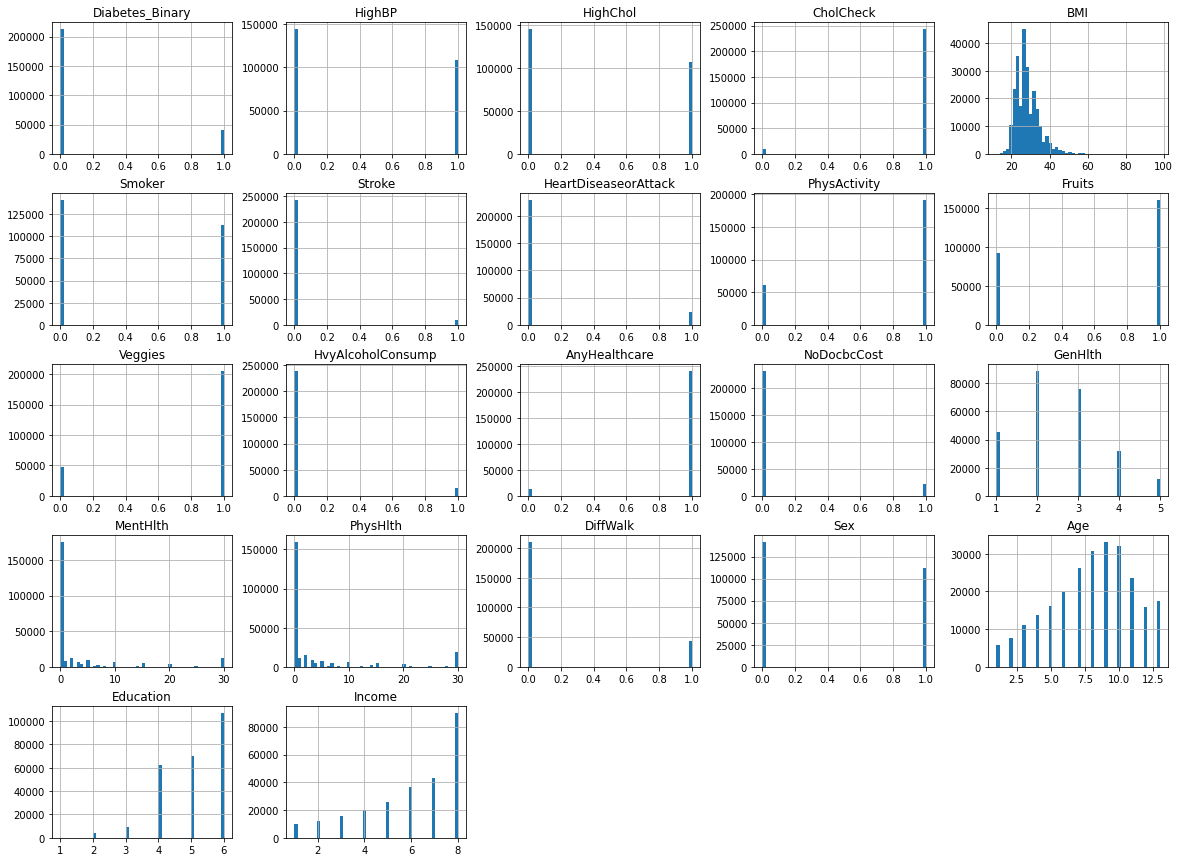

In [43]:
import matplotlib.pyplot as plt
brfss.hist(bins=50, figsize=(20,15))
plt.show()

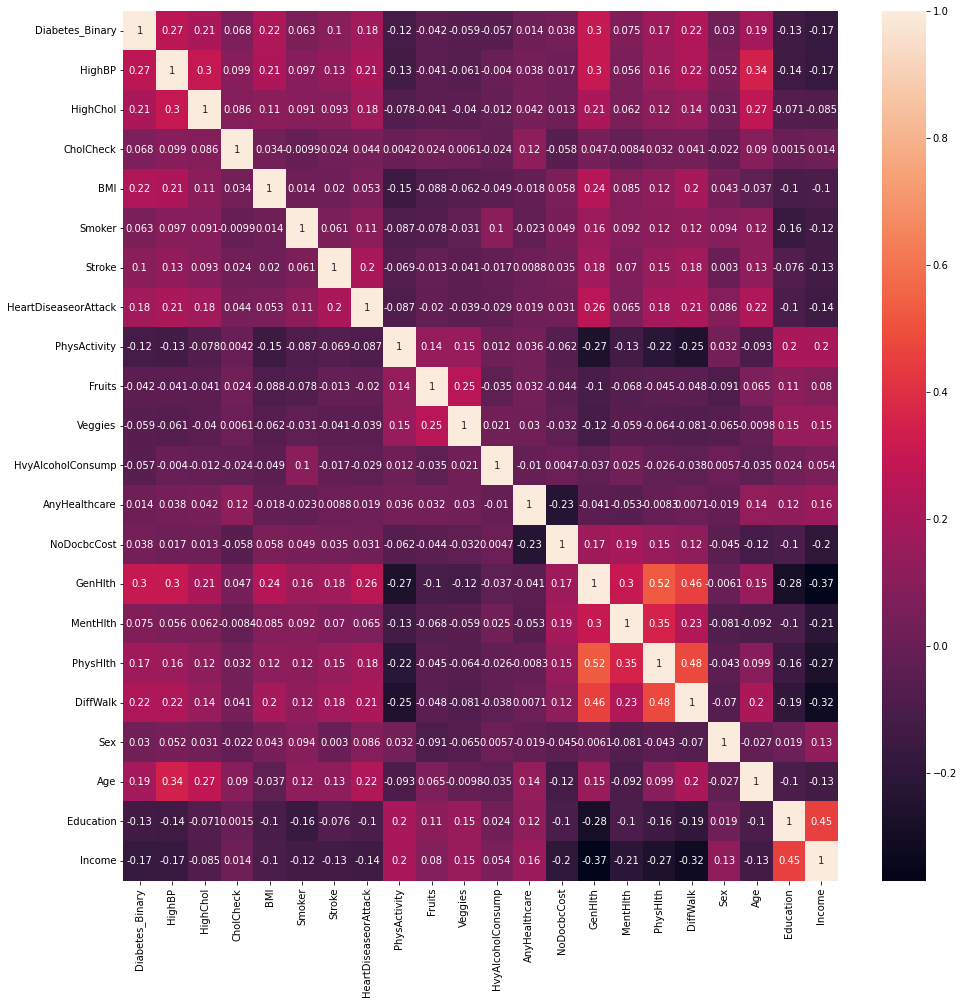

In [44]:
import seaborn as sns
plt.figure(figsize = (16,16))
sns.heatmap(brfss.corr(), annot = True)
plt.show()

# Split the Data
Splitting the trainingg and test data in 80-20 split. Further doing an 80-20 split on the training data to get validation data

In [45]:
X_all = brfss.drop(columns='Diabetes_Binary', axis=1)
Y_all = brfss['Diabetes_Binary']

In [46]:
from sklearn.model_selection import train_test_split
X_train_all, X_test, y_train_all, y_test = train_test_split(X_all, Y_all, test_size = 0.20, random_state = 0)

In [47]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_all, y_train_all, test_size = 0.20, random_state = 0)

In [48]:
display(X_train.shape)
display(X_test.shape)
display(X_valid.shape)
display(y_train.shape)
display(y_test.shape)
display(y_valid.shape)

(162355, 21)

(50736, 21)

(40589, 21)

(162355,)

(50736,)

(40589,)

# Scaling of BMI, Mental and Physical health

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler_bmi = MinMaxScaler()
scaler_menthlth = MinMaxScaler()
scaler_physhlth = MinMaxScaler()

X_train['normBMI'] = scaler_bmi.fit_transform(X_train['BMI'].values.reshape(-1, 1))
X_test['normBMI'] = scaler_bmi.transform(X_test['BMI'].values.reshape(-1, 1))
X_valid['normBMI'] = scaler_bmi.transform(X_valid['BMI'].values.reshape(-1, 1))

X_train['normMentHlth'] = scaler_menthlth.fit_transform(X_train['MentHlth'].values.reshape(-1, 1))
X_test['normMentHlth'] = scaler_menthlth.transform(X_test['MentHlth'].values.reshape(-1, 1))
X_valid['normMentHlth'] = scaler_menthlth.transform(X_valid['MentHlth'].values.reshape(-1, 1))

X_train['normPhysHlth'] = scaler_physhlth.fit_transform(X_train['PhysHlth'].values.reshape(-1, 1))
X_test['normPhysHlth'] = scaler_physhlth.transform(X_test['PhysHlth'].values.reshape(-1, 1))
X_valid['normPhysHlth'] = scaler_physhlth.transform(X_valid['PhysHlth'].values.reshape(-1, 1))

X_train = X_train.drop(['BMI', 'MentHlth', 'PhysHlth'], axis=1)
X_test = X_test.drop(['BMI', 'MentHlth', 'PhysHlth'], axis=1)
X_valid = X_valid.drop(['BMI', 'MentHlth', 'PhysHlth'], axis=1)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

# SMOTE

In [50]:
from imblearn.over_sampling import SMOTE
sm = SMOTE( sampling_strategy='minority',random_state=0)
X_smote, y_smote = sm.fit_resample(X_train, y_train)
np.bincount(y_smote)

array([136856, 136856])

In [51]:
y_train.value_counts()

0.0    136856
1.0     25499
Name: Diabetes_Binary, dtype: int64

In [52]:
y_smote.value_counts()

0.0    136856
1.0    136856
Name: Diabetes_Binary, dtype: int64

In [53]:
#Function to display scores
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

# Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42, solver='liblinear')
log_reg.fit(X_smote, y_smote)

LogisticRegression(random_state=42, solver='liblinear')

Accuracy metric in the train dataset: 0.750416496171158
Recall metric in the train dataset: 0.7749970772198516
Precision metric in the train dataset: 0.7386825830176064
F1 metric in the train dataset: 0.7564042219369562


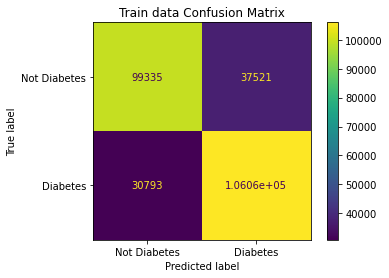

In [55]:
#For training data
y_pred = log_reg.predict(X_smote)

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print("Accuracy metric in the train dataset:", accuracy_score(y_smote, y_pred))
print("Recall metric in the train dataset:", recall_score(y_smote, y_pred))
print("Precision metric in the train dataset:", precision_score(y_smote, y_pred))
print("F1 metric in the train dataset:", f1_score(y_smote, y_pred))

from sklearn.metrics import plot_confusion_matrix
class_names = ['Not Diabetes', 'Diabetes']
plot_confusion_matrix(log_reg, X_smote, y_smote,  values_format = '.5g', display_labels=class_names)
plt.title("Train data Confusion Matrix")
plt.show()

Accuracy metric in the validation dataset: 0.7281529478430117
Recall metric in the validation dataset: 0.7488598836295015
Precision metric in the validation dataset: 0.3353757306852595
F1 metric in the validation dataset: 0.4632746376106625


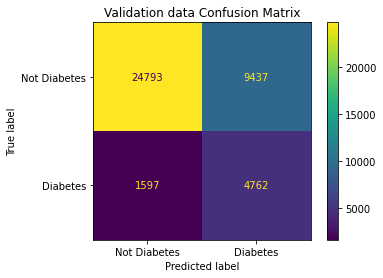

In [56]:
#on validation dataset
y_pred_val = log_reg.predict(X_valid)

print("Accuracy metric in the validation dataset:", accuracy_score(y_valid, y_pred_val))
print("Recall metric in the validation dataset:", recall_score(y_valid, y_pred_val))
print("Precision metric in the validation dataset:", precision_score(y_valid, y_pred_val))
print("F1 metric in the validation dataset:", f1_score(y_valid, y_pred_val))

class_names = ['Not Diabetes', 'Diabetes']
plot_confusion_matrix(log_reg, X_valid, y_valid,  values_format = '.5g', display_labels=class_names)
plt.title("Validation data Confusion Matrix")
plt.show()

In [57]:
# Grid search CV
from sklearn.model_selection import GridSearchCV
parameters = {"penalty": ['l1', 'l2'], 'C': [0.1, 1, 10, 100, 1000]}
log_reg_grid = LogisticRegression(random_state=42, solver='liblinear')
log_reg_clf = GridSearchCV(log_reg_grid, parameters, cv=5, verbose=5, n_jobs=3, scoring='recall')

In [58]:
log_reg_clf = log_reg_clf.fit(X_smote, y_smote)
print(log_reg_clf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  1.7min
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:  5.5min finished


{'C': 100, 'penalty': 'l2'}


In [59]:
log_reg_grid_best = log_reg_clf.best_estimator_

Accuracy metric in the train dataset: 0.7504566843981996
Recall metric in the train dataset: 0.775055532822821
Precision metric in the train dataset: 0.7387125754758372
F1 metric in the train dataset: 0.7564477883363938


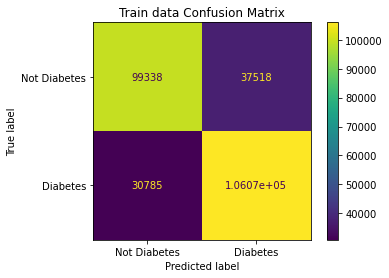

In [60]:
#For training data
y_pred = log_reg_grid_best.predict(X_smote)

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print("Accuracy metric in the train dataset:", accuracy_score(y_smote, y_pred))
print("Recall metric in the train dataset:", recall_score(y_smote, y_pred))
print("Precision metric in the train dataset:", precision_score(y_smote, y_pred))
print("F1 metric in the train dataset:", f1_score(y_smote, y_pred))

from sklearn.metrics import plot_confusion_matrix
class_names = ['Not Diabetes', 'Diabetes']
plot_confusion_matrix(log_reg_grid_best, X_smote, y_smote,  values_format = '.5g', display_labels=class_names)
plt.title("Train data Confusion Matrix")
plt.show()

Accuracy metric in the validation dataset: 0.7281036734090517
Recall metric in the validation dataset: 0.7483881113382608
Precision metric in the validation dataset: 0.3352588939767524
F1 metric in the validation dataset: 0.46307288119100903


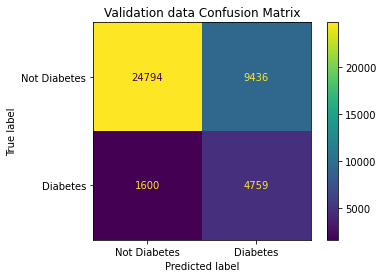

In [61]:
#on validation dataset
y_pred_val = log_reg_grid_best.predict(X_valid)

print("Accuracy metric in the validation dataset:", accuracy_score(y_valid, y_pred_val))
print("Recall metric in the validation dataset:", recall_score(y_valid, y_pred_val))
print("Precision metric in the validation dataset:", precision_score(y_valid, y_pred_val))
print("F1 metric in the validation dataset:", f1_score(y_valid, y_pred_val))

class_names = ['Not Diabetes', 'Diabetes']
plot_confusion_matrix(log_reg_grid_best, X_valid, y_valid,  values_format = '.5g', display_labels=class_names)
plt.title("Validation data Confusion Matrix")
plt.show()

# Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=30, random_state=42)
forest_clf.fit(X_smote, y_smote)

RandomForestClassifier(n_estimators=30, random_state=42)

In [63]:
y_pred = forest_clf.predict(X_smote)

Accuracy metric in the train dataset: 0.9960505933243702
Recall metric in the train dataset: 0.9944321038171509
Precision metric in the train dataset: 0.9976615131988886
F1 metric in the train dataset: 0.9960441908888311


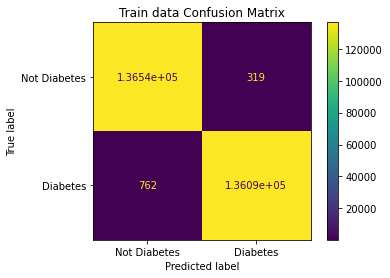

In [64]:
#For training data
y_pred = forest_clf.predict(X_smote)

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print("Accuracy metric in the train dataset:", accuracy_score(y_smote, y_pred))
print("Recall metric in the train dataset:", recall_score(y_smote, y_pred))
print("Precision metric in the train dataset:", precision_score(y_smote, y_pred))
print("F1 metric in the train dataset:", f1_score(y_smote, y_pred))

from sklearn.metrics import plot_confusion_matrix
class_names = ['Not Diabetes', 'Diabetes']
plot_confusion_matrix(forest_clf, X_smote, y_smote,  values_format = '.5g', display_labels=class_names)
plt.title("Train data Confusion Matrix")
plt.show()

Accuracy metric in the validation dataset: 0.8298061051023676
Recall metric in the validation dataset: 0.3082245636106306
Precision metric in the validation dataset: 0.4385768628328485
F1 metric in the validation dataset: 0.3620243812338382


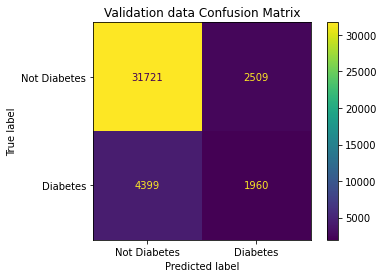

In [65]:
#on validation dataset
y_pred_val = forest_clf.predict(X_valid)

print("Accuracy metric in the validation dataset:", accuracy_score(y_valid, y_pred_val))
print("Recall metric in the validation dataset:", recall_score(y_valid, y_pred_val))
print("Precision metric in the validation dataset:", precision_score(y_valid, y_pred_val))
print("F1 metric in the validation dataset:", f1_score(y_valid, y_pred_val))

class_names = ['Not Diabetes', 'Diabetes']
plot_confusion_matrix(forest_clf, X_valid, y_valid,  values_format = '.5g', display_labels=class_names)
plt.title("Validation data Confusion Matrix")
plt.show()

In [66]:
from sklearn.model_selection import GridSearchCV
parameters= {'n_estimators': [10, 30, 45, 60], 'max_depth': [10,25,50,100,200]}
forest_clf_grid=RandomForestClassifier(random_state=42)
forest_clf_clf=GridSearchCV(forest_clf_grid, parameters, cv=5, scoring='recall')

In [67]:
forest_clf_clf=forest_clf_clf.fit(X_smote, y_smote)
print(forest_clf_clf.best_params_)

[CV] C=0.1, penalty=l1 ...............................................
[CV] ................... C=0.1, penalty=l1, score=0.778, total=  30.9s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ................... C=0.1, penalty=l1, score=0.780, total=  31.2s
[CV] C=1, penalty=l1 .................................................
[CV] ..................... C=1, penalty=l1, score=0.779, total=  31.2s
[CV] C=1, penalty=l1 .................................................
[CV] ..................... C=1, penalty=l1, score=0.780, total=  35.6s
[CV] C=10, penalty=l1 ................................................
[CV] .................... C=10, penalty=l1, score=0.779, total=  32.4s
[CV] C=10, penalty=l1 ................................................
[CV] .................... C=10, penalty=l1, score=0.779, total=  33.7s
[CV] C=100, penalty=l1 ...............................................
[CV] ................... C=100, penalty=l1, score=0.781, total=  34.4s
[CV] C

In [68]:
forest_clf_grid_best = forest_clf_clf.best_estimator_

Accuracy metric in the train dataset: 0.9691573624831941
Recall metric in the train dataset: 0.9812869000993745
Precision metric in the train dataset: 0.9580455998173725
F1 metric in the train dataset: 0.9695269860521528


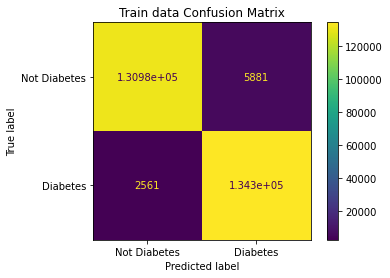

In [69]:
#For training data
y_pred = forest_clf_grid_best.predict(X_smote)

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print("Accuracy metric in the train dataset:", accuracy_score(y_smote, y_pred))
print("Recall metric in the train dataset:", recall_score(y_smote, y_pred))
print("Precision metric in the train dataset:", precision_score(y_smote, y_pred))
print("F1 metric in the train dataset:", f1_score(y_smote, y_pred))

class_names = ['Not Diabetes', 'Diabetes']
plot_confusion_matrix(forest_clf_grid_best, X_smote, y_smote,  values_format = '.5g', display_labels=class_names)
plt.title("Train data Confusion Matrix")
plt.show()

Accuracy metric in the validation dataset: 0.8227105866121363
Recall metric in the validation dataset: 0.40116370498506054
Precision metric in the validation dataset: 0.42953359151372283
F1 metric in the validation dataset: 0.41486420556188003


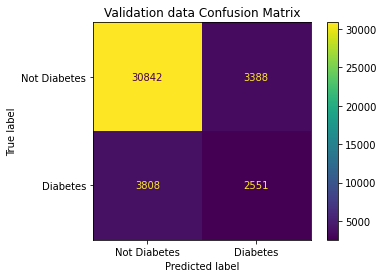

In [70]:
#on validation dataset
y_pred_val = forest_clf_grid_best.predict(X_valid)

print("Accuracy metric in the validation dataset:", accuracy_score(y_valid, y_pred_val))
print("Recall metric in the validation dataset:", recall_score(y_valid, y_pred_val))
print("Precision metric in the validation dataset:", precision_score(y_valid, y_pred_val))
print("F1 metric in the validation dataset:", f1_score(y_valid, y_pred_val))

class_names = ['Not Diabetes', 'Diabetes']
plot_confusion_matrix(forest_clf_grid_best, X_valid, y_valid,  values_format = '.5g', display_labels=class_names)
plt.title("Validation data Confusion Matrix")
plt.show()

# Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_smote, y_smote)

DecisionTreeClassifier(random_state=42)

In [72]:
y_pred = tree_clf.predict(X_smote)

Accuracy metric in the train dataset: 0.9966059215525808
Recall metric in the train dataset: 0.993716022680774
Precision metric in the train dataset: 0.999492889427847
F1 metric in the train dataset: 0.9965960845812524


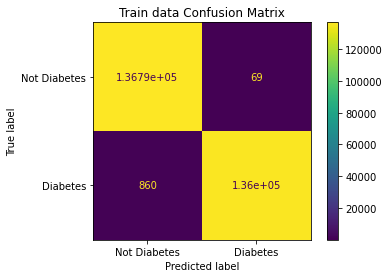

In [73]:
#For training data
y_pred = tree_clf.predict(X_smote)

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print("Accuracy metric in the train dataset:", accuracy_score(y_smote, y_pred))
print("Recall metric in the train dataset:", recall_score(y_smote, y_pred))
print("Precision metric in the train dataset:", precision_score(y_smote, y_pred))
print("F1 metric in the train dataset:", f1_score(y_smote, y_pred))

from sklearn.metrics import plot_confusion_matrix
class_names = ['Not Diabetes', 'Diabetes']
plot_confusion_matrix(tree_clf, X_smote, y_smote,  values_format = '.5g', display_labels=class_names)
plt.title("Train data Confusion Matrix")
plt.show()

Accuracy metric in the validation dataset: 0.7723767523220577
Recall metric in the validation dataset: 0.3447082874665828
Precision metric in the validation dataset: 0.30176211453744495
F1 metric in the validation dataset: 0.3218087058650811


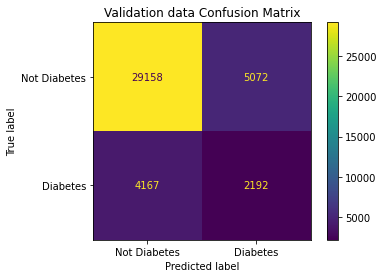

In [74]:
#on validation dataset
y_pred_val = tree_clf.predict(X_valid)

print("Accuracy metric in the validation dataset:", accuracy_score(y_valid, y_pred_val))
print("Recall metric in the validation dataset:", recall_score(y_valid, y_pred_val))
print("Precision metric in the validation dataset:", precision_score(y_valid, y_pred_val))
print("F1 metric in the validation dataset:", f1_score(y_valid, y_pred_val))

class_names = ['Not Diabetes', 'Diabetes']
plot_confusion_matrix(tree_clf, X_valid, y_valid,  values_format = '.5g', display_labels=class_names)
plt.title("Validation data Confusion Matrix")
plt.show()

Depth =  2 , Training Accuracy =  0.7231834921377214 , Validation Accuracy =  0.7590480179358939 , Diff =  3.5864525798172564  %
Depth =  4 , Training Accuracy =  0.7498538609925761 , Validation Accuracy =  0.6896942521372785 , Diff =  6.015960885529759  %
Depth =  6 , Training Accuracy =  0.776604606301514 , Validation Accuracy =  0.7359136711917021 , Diff =  4.069093510981181  %
Depth =  8 , Training Accuracy =  0.7944043374057403 , Validation Accuracy =  0.7601320554830127 , Diff =  3.4272281922727688  %
Depth =  10 , Training Accuracy =  0.816738031215292 , Validation Accuracy =  0.7767129025105324 , Diff =  4.002512870475961  %
Depth =  15 , Training Accuracy =  0.8681058923247793 , Validation Accuracy =  0.8051196136884378 , Diff =  6.298627863634154  %
Depth =  20 , Training Accuracy =  0.9104862044776992 , Validation Accuracy =  0.7936879450097317 , Diff =  11.67982594679675  %
Depth =  25 , Training Accuracy =  0.9495637750628397 , Validation Accuracy =  0.7793983591613491 , D

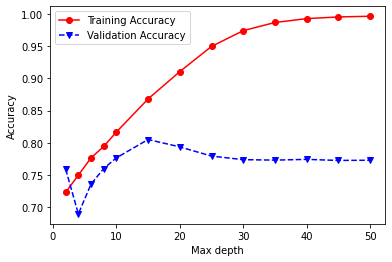

In [78]:
maxdepths = [2,4,6,8,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
valAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_smote, y_smote)
    y_predTrain = clf.predict(X_smote)
    y_predVal = clf.predict(X_valid)
    trainAcc[index] = accuracy_score(y_smote, y_predTrain)
    valAcc[index] = accuracy_score(y_valid, y_predVal)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Validation Accuracy = ", valAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-valAcc[index])*100), " %")
    index += 1

    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,valAcc,'bv--')
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');

In [88]:
from sklearn.model_selection import GridSearchCV
parameters= {'min_samples_split': [5, 10, 15, 20], 'max_depth': [6,8,10,15,20] }
tree_clf_grid=DecisionTreeClassifier(random_state=42)
tree_clf_clf=GridSearchCV(tree_clf_grid, parameters, cv=5, scoring='recall')

In [89]:
tree_clf_clf=tree_clf_clf.fit(X_smote, y_smote)
print(tree_clf_clf.best_params_)

{'max_depth': 20, 'min_samples_split': 5}


In [90]:
tree_clf_grid_best = tree_clf_clf.best_estimator_

Accuracy metric in the train dataset: 0.9056270824808558
Recall metric in the train dataset: 0.9060910738294266
Precision metric in the train dataset: 0.9052510165494988
F1 metric in the train dataset: 0.9056708503901927


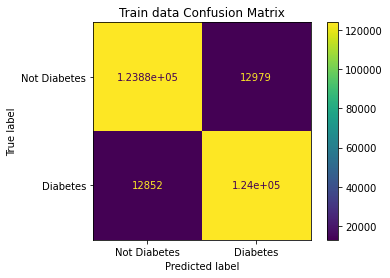

In [91]:
#For training data
y_pred = tree_clf_grid_best.predict(X_smote)

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print("Accuracy metric in the train dataset:", accuracy_score(y_smote, y_pred))
print("Recall metric in the train dataset:", recall_score(y_smote, y_pred))
print("Precision metric in the train dataset:", precision_score(y_smote, y_pred))
print("F1 metric in the train dataset:", f1_score(y_smote, y_pred))

class_names = ['Not Diabetes', 'Diabetes']
plot_confusion_matrix(tree_clf_grid_best, X_smote, y_smote,  values_format = '.5g', display_labels=class_names)
plt.title("Train data Confusion Matrix")
plt.show()

Accuracy metric in the validation dataset: 0.7984675651038459
Recall metric in the validation dataset: 0.434502280232741
Precision metric in the validation dataset: 0.37607186606778276
F1 metric in the validation dataset: 0.403181088574347


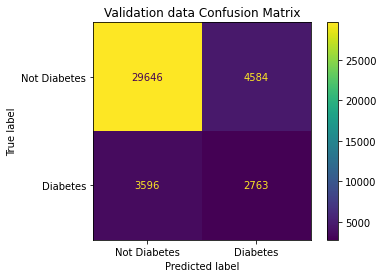

In [92]:
#on validation dataset
y_pred_val = tree_clf_grid_best.predict(X_valid)

print("Accuracy metric in the validation dataset:", accuracy_score(y_valid, y_pred_val))
print("Recall metric in the validation dataset:", recall_score(y_valid, y_pred_val))
print("Precision metric in the validation dataset:", precision_score(y_valid, y_pred_val))
print("F1 metric in the validation dataset:", f1_score(y_valid, y_pred_val))

class_names = ['Not Diabetes', 'Diabetes']
plot_confusion_matrix(tree_clf_grid_best, X_valid, y_valid,  values_format = '.5g', display_labels=class_names)
plt.title("Validation data Confusion Matrix")
plt.show()

# Random Forest and Decision Tree are overfitting, the recall is low hence going with the logistic regression

In [93]:
#Logistic regression on the test set

Accuracy metric in the test dataset: 0.7307237464522233
Recall metric in the test dataset: 0.7636408424682842
Precision metric in the test dataset: 0.3455386501699827
F1 metric in the test dataset: 0.4757885043358145


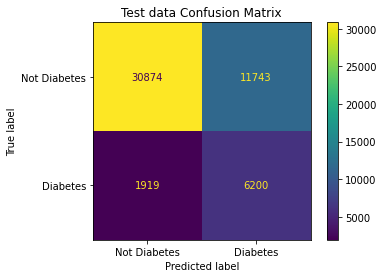

In [94]:
y_pred_test = log_reg_grid_best.predict(X_test)

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print("Accuracy metric in the test dataset:", accuracy_score(y_test, y_pred_test))
print("Recall metric in the test dataset:", recall_score(y_test, y_pred_test))
print("Precision metric in the test dataset:", precision_score(y_test, y_pred_test))
print("F1 metric in the test dataset:", f1_score(y_test, y_pred_test))

class_names = ['Not Diabetes', 'Diabetes']
plot_confusion_matrix(log_reg_grid_best, X_test, y_test,  values_format = '.5g', display_labels=class_names)
plt.title("Test data Confusion Matrix")
plt.show()

In [95]:
from sklearn.metrics import auc, roc_curve
y_k =  log_reg_grid_best.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_k)
roc_auc = auc(fpr, tpr)
print("ROC-AUC:", roc_auc)

ROC-AUC: 0.8195202448012221


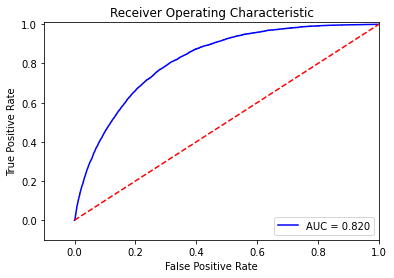

In [96]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()